<a href="https://colab.research.google.com/github/project-ida/two-state-quantum-systems/blob/master/05-many-two-state-systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a href="https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/05-many-two-state-systems.ipynb" target="_parent"><img src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# 5 - Many two state systems

We have already seen the interesting physics that can arise from the interaction of a single two-state system (TSS) with a quantised field. Although there is still more that we can explore there, it's even more interesting to start thinking about what happens when we start to include many TSS.

As soon as we start adding more than one TSS things get quite complicated. In order to give us an intuition for how such systems behave, we will take a small step back in this tutorial and remove the quantised field (don't worry, we'll bring it back in the next tutorial).

This tutorial is split up into the following sections
1. Describing the states
2. Two state system recap
3. Independent two state systems
4. Stationary states
5. Angular momentum
6. Simulation in the Dicke basis
7. Isolated universes

In [9]:
# Libraries
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from itertools import product
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from qutip import *
from qutip.piqs import *
from qutip.cy.piqs import j_min, j_vals, m_vals

# The helper file below brings in the following functions
# make_df_for_energy_scan - we made this in tutorial 4
# make_braket_labels - we made this in tutorial 4
# prettify_states
from libs.helper_05_tutorial import *

## 5.1 - Describing the states

We'll start simple and look at 2 TSS. We can describe this system by the different possible combinations of the higher (+) and lower (-) energy states of the individual TSS namely:
- $|+,+\rangle$
- $|+,-\rangle$
- $|-,+\rangle$
- $|-,-\rangle$

We can see that 2 TSS is actually a 4 state system. Mathematically these 4 states can be represented as vectors of length 4 using the following basis:

$$
|+,+\rangle = \begin{bmatrix}
 1   \\
 0   \\
 0   \\
 0   \\
 \end{bmatrix}, 
|+,-\rangle = \begin{bmatrix}
 0   \\
 1   \\
 0   \\
 0   \\
\end{bmatrix}, 
|-,+\rangle = \begin{bmatrix}
 0   \\
 0   \\
 1   \\
 0   \\
\end{bmatrix}, 
|-,-\rangle = \begin{bmatrix}
 0   \\
 0   \\
 0   \\
 1   \\
\end{bmatrix}
$$

How do we create these states in QuTiP?

In [Tutorial 3](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/03-a-two-state-system-in-a-quantised-field.ipynb#3.5---Describing-coupled-systems-in-QuTiP) we learnt to describe such states by using the tensor product. For example, we would create the $|+,-\rangle$ state by doing:

In [2]:
pm = tensor(basis(2,0), basis(2,1))
pm

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

and we can keep track of which basis states corresponds to which row of the vector by using the `product` function that we introduced in the previous tutorial. Specifically:

In [3]:
possible_ms = ["+","-"]
mm_list = [mm for mm in product(possible_ms, possible_ms)]
mm_list

[('+', '+'), ('+', '-'), ('-', '+'), ('-', '-')]

So, the row number 1 of the state vector refers to the basis state:

In [4]:
mm_list[1]

('+', '-')

How does such a system behave?

## 5.2 - Two state system recap

We have previously looked at a TSS whose states are allowed to couple to each other with strength $A$. This coupling resulted in a splitting of the stationary states (i.e. states of constant energy). When we perturbed the energy of those states by an amount $\pm \delta$ we found (in [tutorial 02](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb#Transition-probability)) that a natural way to represent the Hamiltonian is

$$
H = \begin{bmatrix}
 A  &  \delta  \\
 \delta  &  -A  \\
\end{bmatrix} = A\sigma_z +\delta \sigma_x
$$

The basis states being used to represent this system are the stationary states of the unperturbed system ($\delta=0$) that we describe by:

$$
|+\rangle = \begin{bmatrix}
 1   \\
 0   \\
 \end{bmatrix}, 
|-\rangle = \begin{bmatrix}
 0   \\
 1   \\
\end{bmatrix}
$$

where $|+\rangle$, $|-\rangle$ correspond to the higher and lower energy states respectively. 

You may recall from [tutorial 2](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb#Transition-probability) that there are mathematical similarities between a TSS and a spin $1/2$ particle. When considering many TSS, we will find it invaluable to refer to well known spin results, such as conservation of angular momentum, to help us solve problems. In light of this, we will introduce a factor of $1/2$ into the Hamiltonian:

$$
H = \frac{1}{2}A\sigma_z +\frac{1}{2}\delta \sigma_x
$$

so that we can rewrite the Hamiltonian in terms of spin operators, (denoted by $S$), for a [spin $1/2$ particle](https://en.wikipedia.org/wiki/Spin-%C2%BD#Observables), i.e.

$$
H = A S_{z} + \delta S_{x}
$$


## 5.3 - Independent two state systems


A natural starting point for the Hamiltonian of $N$ independent TSS each interacting with a perturbing "field" of strength $\delta$ is to simply add many TSS Hamiltonians together, i.e.

$$
H = A \overset{N}{\underset{n=1}{\Sigma}} S_{n z} +  \delta \overset{N}{\underset{n=1}{\Sigma}} S_{n x} 
$$

Because spin represents angular momentum, the sum of $N$ spin operators above is mathematically the same as how one would create the [total angular momentum operators](https://www2.ph.ed.ac.uk/~ldeldebb/docs/QM/lect15.pdf) - denoted by $J$, e.g. $J_x = \overset{N}{\underset{n=1}{\Sigma}} S_{n x}$. The Hamiltonian can then be written more compactly as:

$$
H = A J_{z} +  \delta J_{x}
$$


QuTiP has a nice function, [`jspin`](http://qutip.org/docs/latest/apidoc/functions.html#qutip.piqs.jspin),  to generate the $J$ operators for any given number of TSS (note, you must import [`qutip.piqs`](http://qutip.org/docs/latest/apidoc/functions.html#module-qutip.piqs) to use this).

Let's create the $J$ operators for 2 TSS:

In [5]:
J = jspin(2, basis="uncoupled")

$J$ contains all 3 operators:
- $J_x$ = `J[0]`
- $J_y$ = `J[1]`
- $J_z$ = `J[2]`

Let's see how the $J_z$ operator acts on the $|+,-\rangle$ state we created earlier.

In [6]:
J[2]*pm

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]]

We get zero because $J_z$ is in essence creating a running total of the number of "spin ups" (+)  minus the "spin downs" (-). For $|+,-\rangle$ we have 1 up and 1 down and so we get zero.

To understand how such a system behaves we proceed as we have done several times by looking for the stationary states of the system. When the system is in one of these states it will remain there for all time. Such states are described by a single constant energy.

To find the states of constant energy, we'll follow what we did in [tutorial 2](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb#2.1-Static-perturbation). Specifically, we will calculate the eigenvalues and eigenvectors *(sometimes also called eigenstates or eigenkets)* of the Hamiltonian and see how they depend on the the perturbation strength $\delta$.

Let's see what we find.

## 5.4 - Stationary states

First let's create the data structures to store the eigenvalue and eigenvector information.

In [15]:
num_deltas = 100

# df holds the data about the energy of the stationary states
# make_df_for_energy_scan - imported from helper (see top of notebook)
df = make_df_for_energy_scan("$\delta$/A", -4,4, num_deltas, J[0].shape[0]) 

# vec will store the eigenvectors, i.e. the stationary states for each value of delta
vec = np.zeros([J[0].shape[0], J[0].shape[0], num_deltas])

Let's see what we've made

In [19]:
df.head()

,$\delta$/A,level_0,level_1,level_2,level_3
0,-4.000000,0.0,0.0,0.0,0.0
1,-3.919192,0.0,0.0,0.0,0.0
2,-3.838384,0.0,0.0,0.0,0.0
3,-3.757576,0.0,0.0,0.0,0.0
4,-3.676768,0.0,0.0,0.0,0.0


In [21]:
vec.shape

(4, 4, 100)

We'll use the same value for $A$ as in tutorials 1 and 2.

In [11]:
A=0.1

We now go through each value of $\delta$, create the Hamiltonian, find it's eigenvalues and eigenvectors and store the results.

In [23]:
for i, row in df.iterrows():
    H = A*J[2] + row[ "$\delta$/A"]*A*J[0]
    evals, ekets = H.eigenstates()
    df.iloc[i,1:] = evals
    for j, ket in enumerate(ekets):
        ket = np.transpose(ket)
        vec[j,:,i] = np.abs(ket*np.conj(ket))

Let's have a look at the energy levels first, i.e. the eigenvalues that we stored in `df`.

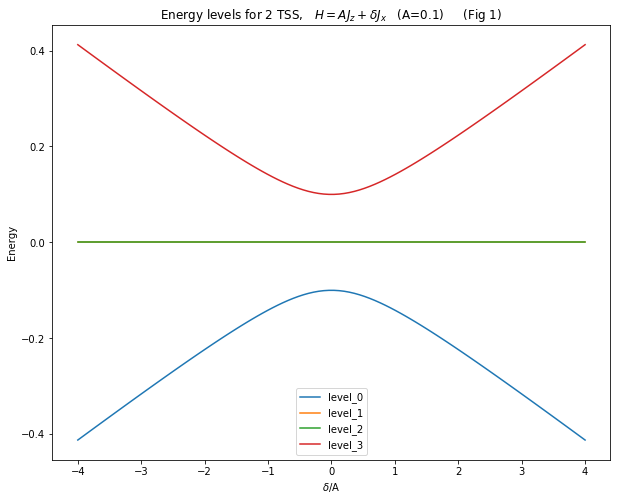

In [30]:
df.plot(x="$\delta$/A",figsize=(10,8),legend=True, 
        title="Energy levels for 2 TSS,   $H=AJ_{z} + \delta J_{x}$   (A=0.1)     (Fig 1)");
plt.ylabel("Energy");

Superficially, Fig 1 resembles Fig 3 of [tutorial 2](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb#2.1-Static-perturbation) in that we see an avoided crossing when there is zero perturbation. 

What's more interesting is that 2 of the levels (1 and 2) have the same energy (aka [degenerate](https://en.wikipedia.org/wiki/Degenerate_energy_levels) levels) whose value does not show any dependence on $\delta$. To understand these degenerate states, we need to look at the eigenstates and how they change with $\delta$.

In [25]:
# Create the bra and ket labels for making nice labels for plots
# make_braket_labels - imported from helper (see top of notebook)
bra_labels, ket_labels = make_braket_labels(mm_list)

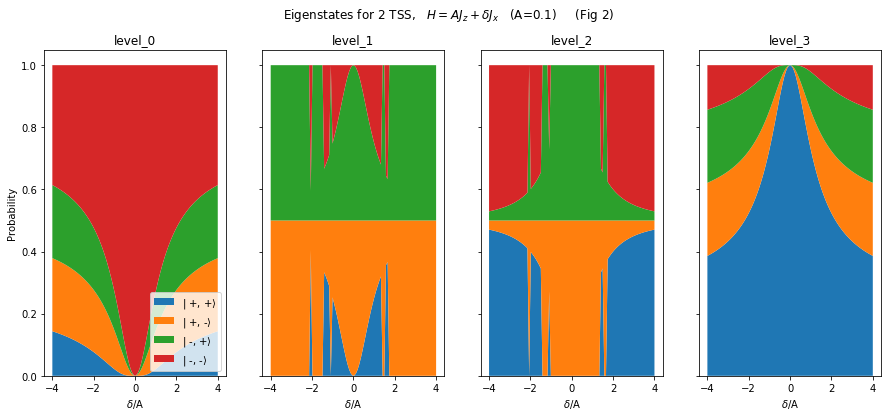

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,6), sharey=True)

for i in range(0,vec.shape[0]):
    axes[i].stackplot(df[ "$\delta$/A"], vec[i,:,:], labels=ket_labels);
    axes[i].set_xlabel("$\delta$/A")
    axes[i].set_title(f"level_{i}")
axes[0].set_ylabel("Probability")
axes[0].legend(loc='lower right')

fig.suptitle('Eigenstates for 2 TSS,   $H=AJ_{z} + \delta J_{x}$   (A=0.1)     (Fig 2)');

Fig 2 shows us what the eigenstates (which corresponds to a particular energy level) are made of, i.e. how much of each basis state makes up each eigenstate. For example, level_0 with $\delta/A = -0.4$, is made up of roughly:
- 40% $|-,- \rangle$ (red)
- 20% $|-,+ \rangle$ (green)
- 25% $|+,- \rangle$ (orange)
- 15% $|+,+ \rangle$ (blue)


We expect the eigenstates to change in a smooth way as we change $\delta$, but we can see that level_1 and level_2 show some spiky behaviour. This is due to the degenerate nature of the energy levels and also the numerical methods used by QuTiP - the eigenstates can sometimes swap their position in the numpy array. We can fix this manually in the following way:

In [32]:
# Looks at level 1 and finds the places where the state |+,+> (blue) has a non zero value i.e. the spiky points
ind = vec[1,0,:] > 0 

# swaps the eigenstates of level_1 and level_2 only at the spiky places
vec[1,:,ind], vec[2,:,ind] = vec[2,:,ind], vec[1,:,ind]

Now let's replot 

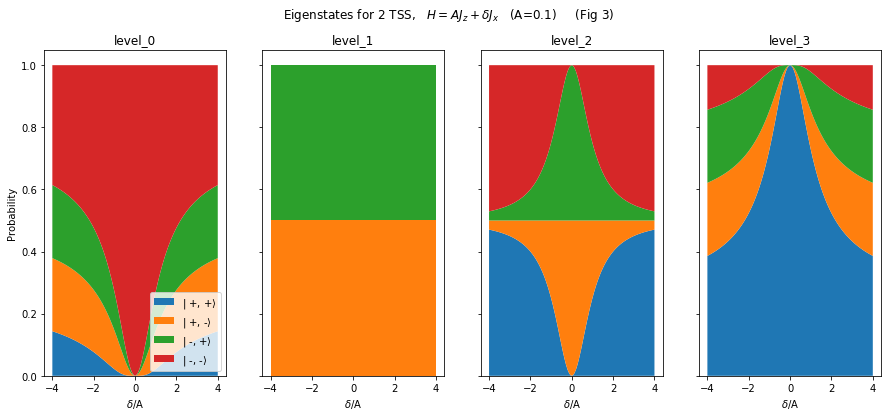

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,6), sharey=True)

for i in range(0,vec.shape[0]):
    axes[i].stackplot(df[ "$\delta$/A"], vec[i,:,:], labels=ket_labels);
    axes[i].set_xlabel("$\delta$/A")
    axes[i].set_title(f"level_{i}")
axes[0].set_ylabel("Probability")
axes[0].legend(loc='lower right')

fig.suptitle('Eigenstates for 2 TSS,   $H=AJ_{z} + \delta J_{x}$   (A=0.1)     (Fig 3)');

Much better. There is a lot to say about Fig 3:
1. As $\delta \rightarrow 0$, level_0 and level_3 behave as you would expect, namely the lowest energy level_0 becomes $|-,-\rangle$, and the highest energy level_3 becomes $|+,+\rangle$
2. Level_1 has no dependency on the perturbation $\delta$
3. As $\delta \rightarrow 0$, level_2 approaches the same as level_1 (within a phase factor)

The indifference of level_1 to $\delta$ seems mysterious - why does this level stand out from the others? In order to solve this mystery, we need to first understand the composition of the eigenstates for small $\delta$.

In [38]:
delta = 0.001
H = A*J[2] + delta*J[0]
evals, ekets = H.eigenstates()

In [39]:
# prettify_states - imported from helper (see top of notebook)
prettify_states(ekets, mm_list)

,0,1,2,3
"(+, +)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j
"(+, -)",-0.0+0.0j,-0.7+0.0j,-0.7+0.0j,0.0+0.0j
"(-, +)",-0.0+0.0j,-0.7+0.0j,0.7+0.0j,0.0+0.0j
"(-, -)",1.0+0.0j,-0.0+0.0j,0.0+0.0j,0.0+0.0j


We can see that levels 1 and 2 are "in phase" and "out of phase" mixtures of  $|+,-\rangle$ and  $|-,+\rangle$ This kind of combination of basis states is often referred to as an [entangled state](https://en.wikipedia.org/wiki/Quantum_entanglement#Pure_states). 

>The subject of quantum entanglement deserves at least a whole tutorial, so we'll come back to it another time.

When we compare these eigenstates to those from the unperturbed case, i.e. $\delta=0$, we see a significant difference in levels 1 and 2:

In [36]:
H0 =  A*J[2]
evals0, ekets0 = H0.eigenstates()

In [37]:
prettify_states(ekets0, mm_list)

,0,1,2,3
"(+, +)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j
"(+, -)",0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j
"(-, +)",0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j
"(-, -)",1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


This difference persists even down to the tiniest values of $\delta$. This suggests that there might be a "better" way to represent the states of our system than the one we chose in section 5.1. Specifically, the results are suggesting a basis made up those entangled states from above -  something like this (ignoring normalisation factors):

- $|+,+\rangle$
- $|+,-\rangle$ + $|-,+\rangle$
- $|+,-\rangle$ - $|+,+\rangle$
- $|-,-\rangle$

Although our original basis was perfectly fine to use, there is clearly something important to understand about this basis made up of entangled states.

What makes the entangled basis special? It has to do with angular momentum.

## 5.5 - Angular momentum

Although we are not dealing explicitly with the physics of spin angular momentum, we are using the same mathematics. For example, we are already using the x and z "components" of the total angular momentum operator $J_x$ and $J_z$. What can we learn from other operators, e.g. what about the "magnitude" of the total angular momentum operator? 

I use quote marks around "component" and "magnitude" because this is vector language which is not obviously applicable to operators. It turns out, however, that we can treat the angular momentum operator as a vector in some sense (see [spinors](https://en.wikipedia.org/wiki/Spinors_in_three_dimensions)). We can create the squared magnitude of the total angular momentum operator ($J^2$) much like we would a vector - we sum of the squares of the components.

In [21]:
J2 = J[0]*J[0] + J[1]*J[1] + J[2]*J[2]
J2

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 2.]]

What does this operator tell us?

Just as we learnt about states of constant energy by calculating the eigenvalues and eigenvectors of the Hamiltonian, we can learn about states of constant angular momentum by calculating the eigenvalues and eigenvectors of $J^2$.


In [22]:
evalsJ, eketsJ = J2.eigenstates()

In [23]:
evalsJ

array([1.11022302e-15, 2.00000000e+00, 2.00000000e+00, 2.00000000e+00])

Although not immediately obvious, the eigenvalues of $J^2$ always have the form $j(j+1)$, where $j$ is a number that characterises the angular momentum of the system with $2j$ being an integer. Therefore, even without explicitly looking at the eigenstates of $J^2$, we know they must correspond to:
- j=0 - one state
- j=1 - three states

But, where do these $j$ numbers come from, and what does it mean to have many states with the same value of $j$?


In quantum mechanics, it has been found experimentally that [angular momentum is quantised](https://www.feynmanlectures.caltech.edu/II_34.html#Ch34-S7) in the sense that when its z component is measured it can only take values $m\hbar$ where $m = j, (j-1), (j-2), ..., -(j-2), -(j-1), -j$.

So, although we still haven't explicitly looked the 4 eigenstates of $J^2$, we can say that the eigenstates can be uniquely described by 2 numbers $|j, m \rangle$, namely:

- $|0, 0 \rangle$
- $|1, -1 \rangle$
- $|1, 0 \rangle$
- $|1, 1 \rangle$

The specific $j$ and $m$ numbers come from adding up the angular momentum for many single TSS (with $j=1/2$) like vectors of the same length but different (quantised) orientations. The details are somewhat tedious - often involving [formidable lookup tables](http://pdg.lbl.gov/2019/reviews/rpp2019-rev-clebsch-gordan-coefs.pdf). Luckily for us, QuTiP, has some convenient functions (that are somewhat hidden inside of [`qutip.cy.piqs`](https://github.com/qutip/qutip/blob/85632bc66fdcd45be51e1c280ea7577f04761a67/qutip/cy/piqs.pyx)) to help us.
- [`j_vals(N)`](https://github.com/qutip/qutip/blob/85632bc66fdcd45be51e1c280ea7577f04761a67/qutip/cy/piqs.pyx#L130) - tells us the different $j$ values for $N$ TSS.
- [`m_vals(j)`](https://github.com/qutip/qutip/blob/85632bc66fdcd45be51e1c280ea7577f04761a67/qutip/cy/piqs.pyx#L147) tells us the $m$ values for a given $j$

e.g.

In [24]:
j_vals(2)

array([0., 1.])

In [25]:
m_vals(1)

array([-1,  0,  1])

Let's now take a look at the eigenstates in the |±, ±> basis and see if we can match them to the corresponding $|j, m \rangle$ that we've just motivated.

In [26]:
prettify_states(eketsJ, mm_list)

,0,1,2,3
"(+, +)",0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j
"(+, -)",0.7+0.0j,0.0+0.0j,0.7+0.0j,0.0+0.0j
"(-, +)",-0.7+0.0j,0.0+0.0j,0.7+0.0j,0.0+0.0j
"(-, -)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j


Keeping in mind that ± corresponds to $m= ±1/2$ we have:

- $\mathbf{0} = 0.7|+, - \rangle - 0.7|-, + \rangle = |0, 0 \rangle$ ($m=0$ because + and - cancel out, $j=0$ because of anti-parallel addition of states)
- $\mathbf{1} = \ \ \ \ \  |+,+ \rangle \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = |1, 1 \rangle$ 
- $\mathbf{2} = 0.7|+, - \rangle + 0.7|-, + \rangle = |1, 0 \rangle$ ($m=0$ because + and - cancel out, $j=1$ because of parallel addition of states)
- $\mathbf{3} =  \ \ \ \ \  |-,- \rangle \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  = |1, -1 \rangle$ 

You might have also noticed that these eigenstates are identical to the mysterious entangled basis states that we encountered earlier. This implication is that we might do a better job of describing many TSS interacting with some field by working in a basis corresponding to states of constant "angular momentum".

Let's have a go and running a simulation using this basis (often called the [Dicke basis](https://journals.aps.org/pr/pdf/10.1103/PhysRev.93.99) - see also [here](http://dx.doi.org/10.1002/qute.201800043)) and see what we find.

## 5.6 - Simulation in the Dicke basis

We've already found the stationary states for a static perturbation. Let's proceed as we did in [tutorial 2](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/02-perturbing-a-two-state-system.ipynb#2.2-Time-dependent-perturbation) and introduce a resonant time dependent perturbation. Specifically, the Hamiltonian will be:

$$
H = A J_{z} + \delta J_{x} \cos(\omega t)
$$

with $\omega = A$.

The idea is to start the system off in a stationary state of the unperturbed ($\delta=0$) system and then see what happens when we make $\delta= 0.001$. When the system depends explicitly on time, the energy in not conserved and so the system will evolve away from where it started.  Although $\delta$ is small, we know from our previous experience in tutorial 2 that because the time-dependence is resonant, we can expect the changes in time to be significant.

QuTiP has an easy way for us to create $J$ operators in the Dicke basis . We have used it already [`jspin`](http://qutip.org/docs/latest/apidoc/functions.html#qutip.piqs.jspin) - this time we won't need to use the "basis" parameter.

In [27]:
J = jspin(2)

In this Dicke basis, the states are odered from high to low in $|j, m\rangle$. We can therefore write the ordered list of states `jm_list` as:

In [28]:
jm_list = []
js = j_vals(2)[::-1]
for j in js:
    ms = m_vals(j)[::-1]
    for m in ms:
        jm_list.append((j,m))      
print(jm_list)

[(1.0, 1.0), (1.0, 0.0), (1.0, -1.0), (0.0, -0.0)]


Because we have a time dependent Hamiltonian, we need to use QuTiP's ["string based method"](http://qutip.org/docs/latest/guide/dynamics/dynamics-time.html#string-format-method) to evolve the system (as we did in tutorial 2).

We'll create a function to set up and run the simulation because we'll be doing several of them.

In [36]:
def simulate(A, delta, times, e_level):

    H0 = A*J[2]  # Unperturbed system

    H1 =  delta*J[0] # Perturbation

    H_list = [H0,[H1,'cos(w*t)']]

    evals, ekets = H0.eigenstates()  # Find stationary states of unperturbed system

    psi0 = ekets[e_level] 

    result = sesolve(H_list, psi0, times, args={'w':A})
    
    return result, ekets

In [37]:
times = np.linspace(0.0, 20000.0, 1000) 
delta = 0.001
A = 0.1

In [39]:
# We'll start the system in the highest energy state i.e. level_0, so we put 0 in the last argument
result, ekets = simulate(A, delta, times, 0)

As in tutorials 1 and 2, we need to do some post processing of the results of `sesolve` in order to calculate the probabilities from the state vector and also make things easier to plot.

In addition, we need to transform the state vector into the basis consisting of stationary states of $H_0$ in order to see how the system is moving from one energy state to another.

We'll create a function for this so that we might re-use it.

In [40]:
def make_p_psi_arrays(states, basis=None):
    
    # Create empty numpy arrays to hold psi and P
    num_states = states[0].shape[0]
    num_psi = len(states)
    psi = np.zeros([num_psi, num_states], dtype="complex128")
    P = np.zeros([num_psi, num_states])
    
    # If we add a list of basis states then psi will be transformed into that state before the
    # probabilities are calculated
    if basis is None:
        for i, state in enumerate(states):
            psi[i,:] = np.transpose(state)
            P[i,:] = np.abs(psi[i,:]*np.conj(psi[i,:]))
    else:
        for i, state in enumerate(states):
            transformed_state = state.transform(basis)
            psi[i,:] = np.transpose(transformed_state)
            P[i,:] = np.abs(psi[i,:]*np.conj(psi[i,:]))

    return  psi, P
        

In [41]:
psi, P = make_p_psi_arrays(result.states, ekets) # ekets are the stationary states of H_0

Let's put the probability array inside a dataframe to make it easier to plot.

In [42]:
df = pd.DataFrame(P, index=times)

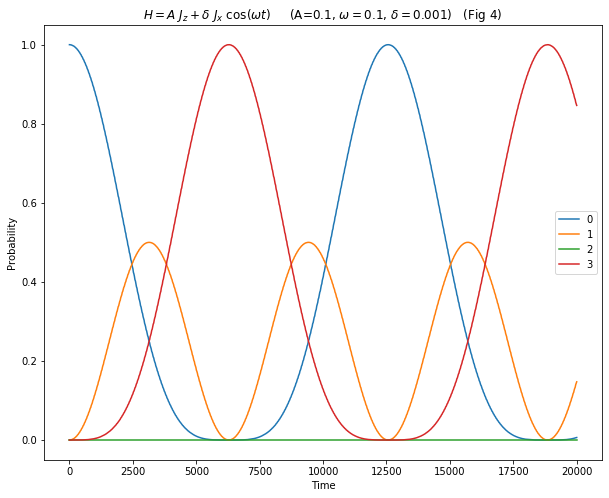

In [43]:
df.plot(figsize=(10,8), 
        title = "$H =A \ J_z + \delta \ J_x \  \cos (\omega t)$     (A=0.1, $\omega = 0.1$, $\delta=0.001$)   (Fig 4)")
plt.xlabel("Time")
plt.ylabel("Probability");

Fig 4 shows us that the system evolves away from the lowest energy level 0 and towards the highest energy level 3 with a high chance (50%) of finding the system in a state of zero energy (level 1) part way through - nothing controversial there.

Fig 4 also shows us that energy level 2 is never occupied - this is unexpected. To understand what's going on, we need to look at the stationary states of the unperturbed system in the Dicke basis.

In [44]:
prettify_states(ekets,jm_list)

,0,1,2,3
"(1.0, 1.0)",0.0+0.0j,0.0+0.0j,0.0+0.0j,1.0+0.0j
"(1.0, 0.0)",0.0+0.0j,1.0+0.0j,0.0+0.0j,0.0+0.0j
"(1.0, -1.0)",1.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
"(0.0, -0.0)",0.0+0.0j,0.0+0.0j,1.0+0.0j,0.0+0.0j


We can see that the stationary states of the unperturbed system are the same as the Dicke basis states i.e. the states of constant energy and constant angular momentum [share a common basis](https://ocw.mit.edu/courses/physics/8-04-quantum-physics-i-spring-2013/study-materials/MIT8_04S13_OnCommEigenbas.pdf). This is only possible if the commutator between the operators is zero - let's check.

In [45]:
H = A*J[2] + delta*J[0]
J2 = J[0]*J[0] + J[1]*J[1] + J[2]*J[2]
commutator(H,J2)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

The zero commutator of $J^2$ with the Hamiltonian means something more - it means that angular momentum is conserved over time, i.e. if we start in a state of a particular $j$ then we can't move to a new $j$. This explains the flat line in Fig 4. We started the simulation in energy level 0 (aka $|1, -1 \rangle$) but the system is incapable of going level 2 (aka $|0, 0 \rangle$) because it has a different angular momentum $j$.

We can confirm this by starting the system off in level 2 instead of level 0:

In [46]:
result, ekets = simulate(A, delta, times, 2)

In [47]:
psi, P = make_p_psi_arrays(result.states, ekets) 

In [48]:
df = pd.DataFrame(P, index=times)

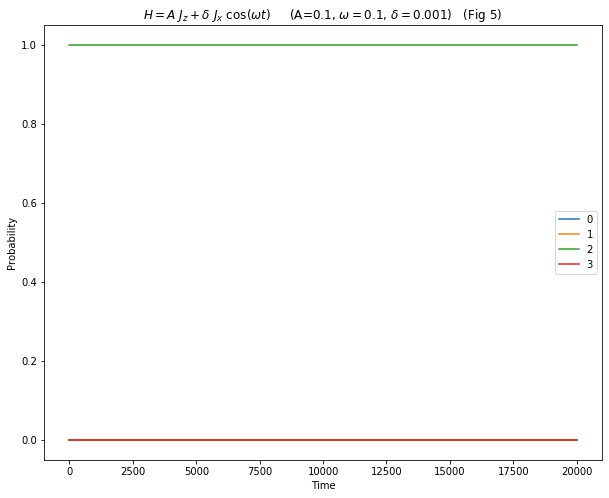

In [49]:
df.plot(figsize=(10,8), 
        title = "$H =A \ J_z + \delta \ J_x \  \cos (\omega t)$     (A=0.1, $\omega = 0.1$, $\delta=0.001$)   (Fig 5)")
plt.xlabel("Time")
plt.ylabel("Probability");

Fig 5 shows that the system doesn't change in time. This is because there is only 1 state with $j=0$, namely |0,0> and so there is nowhere for the state to evolve to without violating the conservation of "angular momentum". 

I use quotation marks around "angular momentum" to remind us that it's not really angular momentum, but something that is mathematically equivalent. Some people call $j$ the Dicke cooperation number to remind us of this distinction.

What does the conservation of $j$ mean for the simulation of many TSS?

# 5.7 - Isolated universes

When we began this tutorial, we described the states of 2 TSS in the |±, ±> basis because it felt natural. For $N$ TSS, such a description creates a very large number of states to consider - specifically $2^{N}$.

Now that we have learnt about the conservation of $j$, not all of the $2^{N}$ states need to be considered in every simulation. Each value of $j$ lives in its own universe (much like [parity in tutorial 4](https://nbviewer.jupyter.org/github/project-ida/two-state-quantum-systems/blob/master/04-spin-boson-model.ipynb#4.4---Parity)) The largest number of states comes when we have maximum $j$, i.e. $j_{\text{max}} = \frac{1}{2} N$. In this case, the number of possible $m$ values is $2j+1 = N+1$ - this grows linear with $N$ rather than exponentially.

Much like in tutorial 3, we can use the [`extract_states`](http://qutip.org/docs/latest/apidoc/classes.html?highlight=extract_states#qutip.Qobj.extract_states) function to only select the relevant $j$'s from the Hamiltonian. To do this, we need to keep track of where the different $j$'s live. We'll create a function for this.

In [50]:
def j_states_list(num_tss):
    i=0
    
    jm_list = []
    j_index = {}

    js = j_vals(num_tss)[::-1]
    
    for j in js:
        j_index[j] = []
        ms = m_vals(j)[::-1]
        for m in ms:
            j_index[j].append(i)
            jm_list.append((j,m))
            i+=1
    return j_index, jm_list

Let's try and simulate the $N=2$ case with $j=1$.

In [51]:
j_index, jm_list = j_states_list(2)
j_index

{1.0: [0, 1, 2], 0.0: [3]}

This says that the first rows/columns 0,1,2 of the Hamiltonian are what we are interest in.

We'll make a function to automate the process of making the various operators required the make the Hamiltonian 

In [52]:
def make_operators(num_tss, j):
    
    j_index, jm_list = j_states_list(num_tss)
    
    try:
        j_index[j]
    except:
        raise Exception(f"j needs to be one of {j_vals(num_tss)}")
    
    Js = jspin(num_tss)
    Jx = Js[0]
    Jy = Js[1]
    Jz = Js[2]
    
    num_ms = len(m_vals(j))
    Jz = Jz.extract_states(j_index[j])
    Jy = Jy.extract_states(j_index[j])
    Jx = Jx.extract_states(j_index[j])
    jm_list = [jm_list[i] for i in j_index[j]]
    
    
    return [Jx, Jy, Jz], jm_list

Let's try this out and re-run the simulation that created Fig 4

In [53]:
J, jm_list = make_operators(2, 1)

In [54]:
result, ekets = simulate(A, delta, times, 0)

In [55]:
psi, P = make_p_psi_arrays(result.states, ekets) 

In [56]:
df = pd.DataFrame(P, index=times)

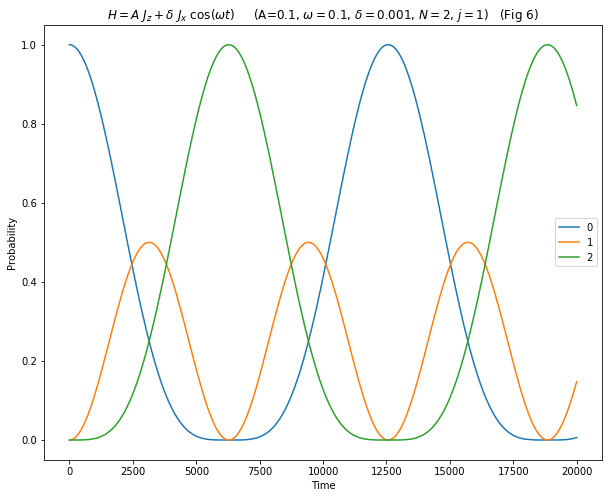

In [57]:
df.plot(figsize=(10,8), 
        title = "$H =A \ J_z + \delta \ J_x \  \cos (\omega t)$     (A=0.1, $\omega = 0.1$, $\delta=0.001$, $N=2$, $j=1$)   (Fig 6)")
plt.xlabel("Time")
plt.ylabel("Probability");

We can see in Fig 6 that we have successfully removed the $j=0$ part from our simulation with no changes to the evolution of the other states - as we would expect.

We've done a lot of work, but now we can reap the rewards by using our functions for an arbitrary number of TSS.

Let's try $N=6$.

In [58]:
j_vals(6)

array([0., 1., 2., 3.])

In [59]:
J, jm_list = make_operators(6, 1)

In [60]:
result, ekets = simulate(A, delta, times, 0)

In [61]:
psi, P = make_p_psi_arrays(result.states, ekets)

In [62]:
df = pd.DataFrame(P, index=times)

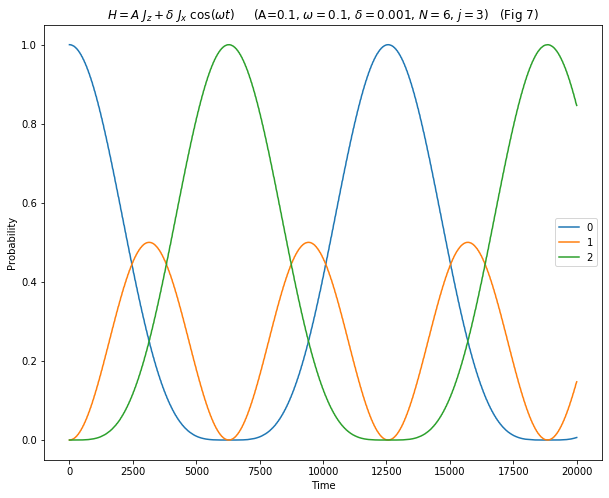

In [63]:
df.plot(figsize=(10,8), 
        title = "$H =A \ J_z + \delta \ J_x \  \cos (\omega t)$     (A=0.1, $\omega = 0.1$, $\delta=0.001$, $N=6$, $j=3$)   (Fig 7)")
plt.xlabel("Time")
plt.ylabel("Probability");

Fig 7 shows something new. The system of 6 TSS, that is coupled to some external field with frequency/energy $\omega$, can raise/lower it's energy by a much greater amount, $6\omega$. It is able to do this by sequentially moving from one energy level to the next, each with a transition energy of $\omega$. 

We might imagine that when we re-introduce the fully quantised field back into the picture that we could see some kind of step-wise down conversion, where many small energy bosons are created as a system of many TSS makes transitions to a state that is much lower in energy than an individual boson. 

You'll have to wait until next time to find out.

> TODO, link back to fig 3 on the indifference of state to delta.